# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2021-12-17 14:10:32
Persistent Unique Scan ID: 'e1b12318-1957-4083-a003-7a42801cb034'


New stream: 'primary'
+-----------+------------+-------------------------+------------+
|   seq_num |       time | aperture_horizontalSize |    w9_mean |
+-----------+------------+-------------------------+------------+
|         1 | 14:10:59.1 |                   0.000 |      0.000 |


|         2 | 14:11:21.5 |                   0.500 | 2510544190625.287 |


|         3 | 14:11:47.0 |                   1.000 | 41560782559219.422 |


|         4 | 14:12:12.5 |                   1.500 | 136793792948293.203 |


|         5 | 14:12:38.0 |                   2.000 | 346875726031568.125 |
+-----------+------------+-------------------------+------------+
generator scan ['e1b12318'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2021-12-17 14:10:59.152156115                      0.0   
2       2021-12-17 14:11:21.597051144                      0.5   
3       2021-12-17 14:11:47.068307877                      1.0   
4       2021-12-17 14:12:12.549711466                      1.5   
5       2021-12-17 14:12:38.078141689                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                    

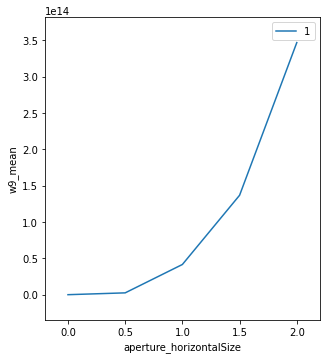

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


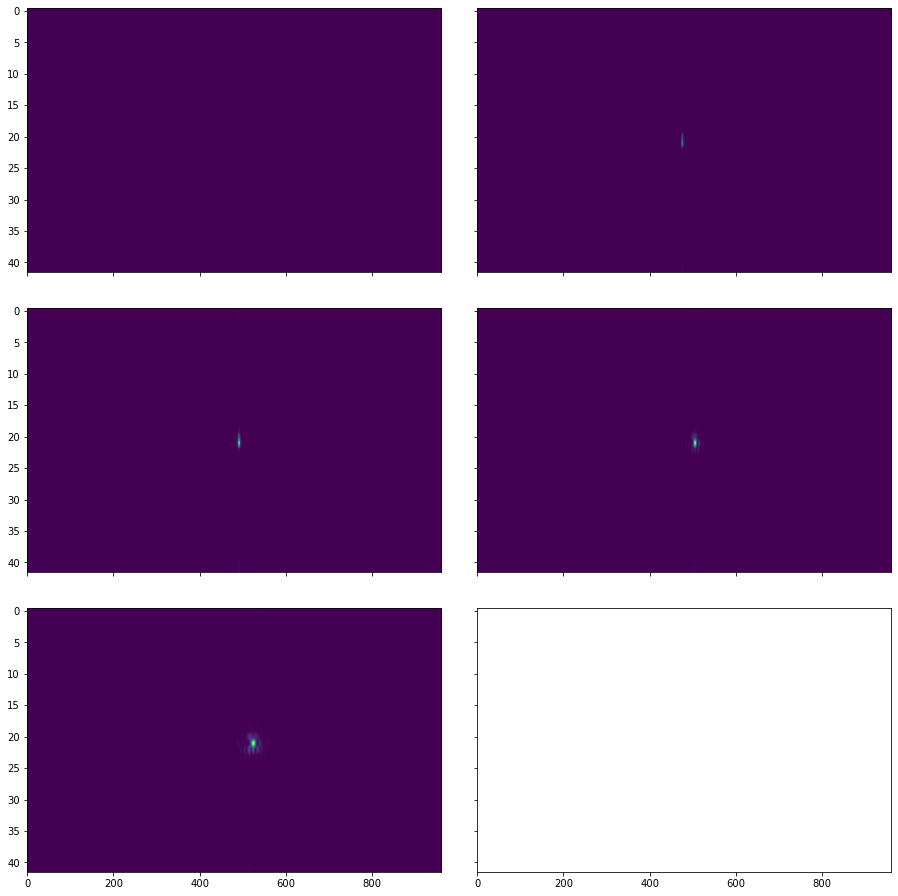

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9



Transient Scan ID: 1     Time: 2021-12-17 14:12:39
Persistent Unique Scan ID: 'ff9e464f-67a8-4a4a-aeb5-67b52f1e80c7'


New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | toroid_r_maj |
+-----------+------------+--------------+
|         1 | 14:12:44.8 |    10000.000 |


|         2 | 14:12:48.9 |    12000.000 |


|         3 | 14:12:53.1 |    14000.000 |


|         4 | 14:12:57.2 |    16000.000 |


|         5 | 14:13:01.3 |    18000.000 |


|         6 | 14:13:05.5 |    20000.000 |


|         7 | 14:13:09.6 |    22000.000 |


|         8 | 14:13:13.8 |    24000.000 |


|         9 | 14:13:17.9 |    26000.000 |


|        10 | 14:13:22.1 |    28000.000 |


|        11 | 14:13:26.2 |    30000.000 |


|        12 | 14:13:30.3 |    32000.000 |


|        13 | 14:13:34.5 |    34000.000 |


|        14 | 14:13:38.6 |    36000.000 |


|        15 | 14:13:42.7 |    38000.000 |


|        16 | 14:13:46.9 |    40000.000 |


|        17 | 14:13:51.0 |    42000.000 |


|        18 | 14:13:55.1 |    44000.000 |


|        19 | 14:13:59.3 |    46000.000 |


|        20 | 14:14:03.4 |    48000.000 |


|        21 | 14:14:07.5 |    50000.000 |
+-----------+------------+--------------+
generator scan ['ff9e464f'] (scan num: 1)





                                 time  \
seq_num                                 
1       2021-12-17 14:12:44.860252142   
2       2021-12-17 14:12:48.992674351   
3       2021-12-17 14:12:53.121427298   
4       2021-12-17 14:12:57.263141393   
5       2021-12-17 14:13:01.388805866   
6       2021-12-17 14:13:05.527014255   
7       2021-12-17 14:13:09.662234545   
8       2021-12-17 14:13:13.838538647   
9       2021-12-17 14:13:17.983196259   
10      2021-12-17 14:13:22.121343851   
11      2021-12-17 14:13:26.258692026   
12      2021-12-17 14:13:30.387624741   
13      2021-12-17 14:13:34.522916794   
14      2021-12-17 14:13:38.653612375   
15      2021-12-17 14:13:42.785581350   
16      2021-12-17 14:13:46.925909758   
17      2021-12-17 14:13:51.056090117   
18      2021-12-17 14:13:55.181832075   
19      2021-12-17 14:13:59.317278147   
20      2021-12-17 14:14:03.449641466   
21      2021-12-17 14:14:07.586088419   

                                      bsr_sirepo_data_js

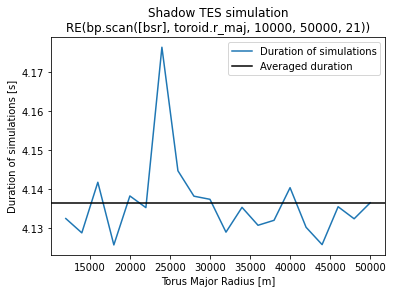

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()